# Price Prediction Project

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

## Data Analysis

In [2]:
df = pd.read_csv('../data/kc_house_data.csv')

In [3]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [4]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
df['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [7]:
df['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [8]:
df = df.loc[df['view'] == 'NONE']

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19422 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             19422 non-null  int64  
 1   date           19422 non-null  object 
 2   price          19422 non-null  float64
 3   bedrooms       19422 non-null  int64  
 4   bathrooms      19422 non-null  float64
 5   sqft_living    19422 non-null  int64  
 6   sqft_lot       19422 non-null  int64  
 7   floors         19422 non-null  float64
 8   waterfront     17312 non-null  object 
 9   view           19422 non-null  object 
 10  condition      19422 non-null  object 
 11  grade          19422 non-null  object 
 12  sqft_above     19422 non-null  int64  
 13  sqft_basement  19422 non-null  object 
 14  yr_built       19422 non-null  int64  
 15  yr_renovated   15972 non-null  float64
 16  zipcode        19422 non-null  int64  
 17  lat            19422 non-null  float64
 18  long  

In [10]:
df = df.drop(columns = ['yr_renovated', 'id', 'date', 'floors', 'view', 'lat', 'long', 'waterfront'])

<AxesSubplot:>

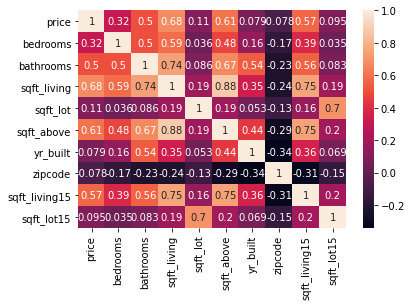

In [12]:
df.corr()
sns.heatmap(df.corr(), annot = True)

In [13]:
df['grade_clean'] = df['grade'].str[:2].astype(int)

In [14]:
grade_group = []
for grade in df['grade_clean']:
    if grade >= 10:
        grade_group.append(2)
    elif grade <= 6:
        grade_group.append(0)
    else:
        grade_group.append(1)


In [15]:
df['grade_group'] = grade_group

In [33]:
df = df.drop(columns = 'grade')

In [16]:
X = df.drop(columns='price')
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [17]:
train_df = X_train.copy()
train_df['price'] = y_train

In [18]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

In [19]:
imputer = SimpleImputer(strategy = 'constant', fill_value = 'unknown')

imputer.fit(X_train)

X_train_nonull = imputer.transform(X_train)
X_test_nonull = imputer.transform(X_test)

In [20]:
for col in range(X_train_nonull.shape[1]):
    col_uniques = np.unique(X_train_nonull[:,col])
    print(len(col_uniques))
    print(col_uniques)

12
[1 2 3 4 5 6 7 8 9 10 11 33]
25
[0.5 0.75 1.0 1.25 1.5 1.75 2.0 2.25 2.5 2.75 3.0 3.25 3.5 3.75 4.0 4.25
 4.5 4.75 5.0 5.25 5.5 6.0 6.25 6.5 7.5]
824
[370 380 390 410 420 430 460 470 480 490 500 520 530 540 550 560 570 580
 590 600 610 620 630 640 650 660 670 680 690 700 710 720 730 740 750 760
 770 780 790 800 810 820 828 830 833 840 850 860 870 880 890 894 900 901
 902 910 920 930 940 950 960 962 970 980 982 988 990 998 1000 1010 1020
 1030 1040 1048 1050 1060 1061 1068 1070 1072 1076 1080 1084 1088 1090
 1092 1095 1100 1108 1110 1120 1122 1130 1131 1140 1150 1160 1170 1175
 1180 1190 1200 1210 1212 1220 1230 1232 1233 1239 1240 1250 1252 1255
 1256 1260 1270 1275 1278 1280 1290 1295 1296 1300 1310 1313 1315 1320
 1322 1330 1340 1347 1350 1352 1358 1360 1370 1380 1381 1390 1392 1396
 1400 1410 1413 1414 1420 1422 1425 1427 1430 1435 1440 1444 1445 1450
 1451 1453 1458 1460 1463 1465 1470 1480 1481 1484 1489 1490 1494 1496
 1500 1502 1509 1510 1516 1520 1522 1528 1530 1540 1550 155

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19422 entries, 0 to 21596
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          19422 non-null  float64
 1   bedrooms       19422 non-null  int64  
 2   bathrooms      19422 non-null  float64
 3   sqft_living    19422 non-null  int64  
 4   sqft_lot       19422 non-null  int64  
 5   condition      19422 non-null  object 
 6   sqft_above     19422 non-null  int64  
 7   sqft_basement  19422 non-null  object 
 8   yr_built       19422 non-null  int64  
 9   zipcode        19422 non-null  int64  
 10  sqft_living15  19422 non-null  int64  
 11  sqft_lot15     19422 non-null  int64  
 12  grade_clean    19422 non-null  int32  
 13  grade_group    19422 non-null  int64  
dtypes: float64(2), int32(1), int64(9), object(2)
memory usage: 2.1+ MB


In [46]:
cat_cols = [5, 7]

encoder = OneHotEncoder(handle_unknown='ignore',
                        categories='auto')

ct = ColumnTransformer(transformers=[('ohe', encoder, cat_cols)],
                       remainder='passthrough', sparse_threshold=0)

ct.fit(X_train_nonull)

X_train_enc = ct.transform(X_train_nonull)
X_test_enc = ct.transform(X_test_nonull)

In [53]:
X_train_enc = .drop(columns = ['condition', 'sqft_basement'])

KeyError: "['condition' 'sqft_basement'] not found in axis"

In [47]:
X_train_enc

array([[0.0, 0.0, 0.0, ..., 8265, 7, 1],
       [0.0, 0.0, 0.0, ..., 12523, 8, 1],
       [0.0, 0.0, 0.0, ..., 4598, 7, 1],
       ...,
       [0.0, 0.0, 0.0, ..., 3600, 8, 1],
       [0.0, 0.0, 0.0, ..., 5407, 6, 0],
       [0.0, 0.0, 0.0, ..., 4800, 7, 1]], dtype=object)

In [48]:
pd.DataFrame(X_train_enc, columns=ct.get_feature_names()).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14566 entries, 0 to 14565
Columns: 257 entries, ohe__x0_10 Very Good to x13
dtypes: object(257)
memory usage: 28.6+ MB


In [52]:
scaler = MinMaxScaler()
scaler.fit(X_train_enc)

X_train_sc = scaler.transform(X_train_enc)
X_test_sc = scaler.transform(X_test_enc)

ValueError: could not convert string to float: 'Average'

In [ ]:
grade_median = train_df.groupby('grade')['price'].median().sort_values(ascending = False)

In [ ]:
dict(grade_median)

In [ ]:
train_df['grade_median'] = train_df['grade'].apply(lambda g: dict(grade_median).get(g))

In [ ]:
cond_median = train_df.groupby('condition')['price'].median().sort_values(ascending = False)

In [ ]:
dict(cond_median)

In [ ]:
train_df['condition_median'] = train_df['condition'].apply(lambda g: dict(cond_median).get(g))

In [ ]:
df['grade'].value_counts().index

In [ ]:
train_df['condition'].value_counts()

In [ ]:
train_df['valuation'] =(train_df['grade_median'] + train_df['condition_median']) / 2

In [ ]:
train_df['valuation_difference'] = train_df['price'] - train_df['valuation']

In [ ]:
train_df.head()

In [40]:
def evaluate_model(X_train, X_test, y_train, y_test, log = False):
    '''
    Expected Good Doc String
    '''
    # Create and fit model
    model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
    
    # Print summary (if OLS)
    print(model.summary())
    
    # Grab predictions
    train_preds = model.predict(sm.add_constant(X_train))
    test_preds = model.predict(sm.add_constant(X_test))
    
    # Evaluate on train and test
    print(f"Train R2 Score: {r2_score(y_train, train_preds):.4f}")
    if log == True:
        y_train_unlog = np.exmp1(y_train)
        train_preds_unlog = np.expm1(train_preds)
        print(f"Train MAE Score: ${mean_absolute_error(y_train_unlog, train_preds_unlog):.4f}")
        print(f"Train RMSE Score: ${mean_squared_error(y_train_unlog, train_preds_unlog, squared=False):.4f}")
    else:
        print(f"Train MAE Score: ${mean_absolute_error(y_train, train_preds):.4f}")
        print(f"Train RMSE Score: ${mean_squared_error(y_train, train_preds, squared=False):.4f}")
    print("*"*20)
    print(f"Test R2 Score: {r2_score(y_test, test_preds):.4f}")
    if log == True:
        y_test_unlog = np.expm1(y_test)
        test_preds_unlog = np.expm1(test_preds)
        print(f"Train MAE Score: ${mean_absolute_error(y_test_unlog, test_preds_unlog):.4f}")
        print(f"Train RMSE Score: ${mean_squared_error(y_test_unlog, test_preds_unlog, squared=False):.4f}")
    else:
        print(f"Train MAE Score: ${mean_absolute_error(y_test, test_preds):.4f}")
        print(f"Train RMSE Score: ${mean_squared_error(y_test, test_preds, squared=False):.4f}")
    print("*"*20)
    
    # Visualize residuals
    plt.scatter(train_preds, y_train-train_preds, label='Train')
    plt.scatter(test_preds, y_test-test_preds, label='Test')

    plt.axhline(y=0, color = 'red', label = '0')
    plt.xlabel('predictions')
    plt.ylabel('residuals')
    plt.legend()
    plt.show()
    
    return train_preds, test_preds

In [37]:
X_train_2 = X_train[['grade_group', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']]
X_test_2 = X_test[['grade_group', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']]

In [ ]:
X_train_3 = X_train
X_test_3 = X_test

In [ ]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler = StandardScaler()
scaler.fit(X_train_2)

X_train_2_sc = scaler.transform(X_train_2)
X_test_2_sc = scaler.transform(X_test_2)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train_3)

X_train_3_sc = scaler.transform(X_train_3)
X_test_3_sc = scaler.transform(X_test_3)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     2739.
Date:                Wed, 29 Jun 2022   Prob (F-statistic):               0.00
Time:                        10:53:35   Log-Likelihood:            -1.9863e+05
No. Observations:               14566   AIC:                         3.973e+05
Df Residuals:                   14560   BIC:                         3.973e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.948e+05   1676.480    295.160      0.0

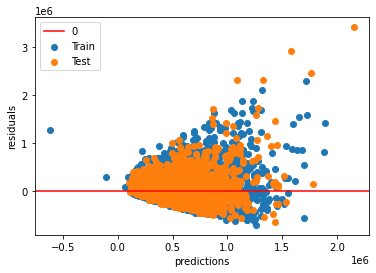

(array([487317.85359336, 776406.20809371, 467814.27630438, ...,
        450174.02625451, 262903.7632825 , 416430.82967347]),
 array([395566.31087054, 469413.87224298, 314445.1027187 , ...,
        396661.96148053, 669278.7823215 , 315154.81618841]))

In [41]:
evaluate_model(X_train_2_sc, X_test_2_sc, y_train, y_test)

In [ ]:
evaluate_model(X_train_3_sc, X_test_3_sc, y_train, y_test)

In [ ]:
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

In [ ]:
evaluate_model(X_train_2_sc, X_test_2_sc, y_train_log, y_test_log)

In [ ]:
evaluate_model(X_train_3_sc, X_test_3_sc, y_train_log, y_test_log)

In [ ]:
model = sm.OLS(labels[:half], data[:half])
predictions = model.predict(data[half:])